# Pymaceuticals Inc.
---

### Analysis
In short, Pymaceutical’s Capomulin is an effective drug treatment for squamous cell carcinoma (SCC) in animals; however, it is not the only effective drug treatment. Capomulin rivals the performance of Ramicane in treating SCC in animals. We can also conclude there is a strong positive correlation (0.84, <0.0001) between average tumor volume (mm^3) and mouse weight (g) in the data for those mice treated with Capomulin. In other words, heavier mice had larger average tumor sizes, whereas lighter mice had smaller mean tumors. Using a regression model, we can predict the average tumor size for a mouse of a given weight or vice versa. 
    
Initially, we surveyed the data for consistency issues. There was one glaring issue with these data that we discovered. The data with Mouse ID ‘g989’ had two different outputs; thus, these data were removed from the dataset altogether in order to fix this issue. Assuming that the experiment was conducted with reliable measuring tools and from a random sample, we can conclude that there are no reliability and validity issues in our dataset.

Our initial exploratory data analysis consisted of bar charts and pie charts showing the number of mice in each drug treatment and the distribution of gender of the mice, respectively. The number of mice per drug treatment varied slightly from treatment to treatment but seemed sufficiently large enough to draw conclusions from each drug regimen. Drug treatment Propiva had the least total observations, but this is due to the duplicate Mouse ID data being removed. All other total observations fell into the range of 170 < n < 240. The distribution of mice sex is a near perfect 50%/50%  in the dataset which is controlled for perfectly. 

In the following phase of EDA, our team constructed boxplots for four drug treatments to analyze the distribution of final tumor volume ( in mm^3) for each treatment. We calculated the IQR for each treatment subset of final tumor volumes, and from this calculation, we analyzed each treatment group for potential outliers using the IQR rule. There was one potential datum that had an outlying final tumor volume for Infubinol. All in all, this quantitative analysis of final tumor volume for Infubinol & Ceftamin drug treatments showed it ineffectiveness for treating SCC. On the other hand, the analyses of drug treatments Capomulin & Ramicane showed the middle 50% of the data for each group was lower than the beginning tumor size of 45.0 mm^3. This led us to assume that these two drug treatments could have statistically significant effects on treating SCC.
    
In the final phase of our analysis, we focused on the treatment group Capomulin in our visualizations. The first line chart shows the data for a random mouse treated with Capomulin, and the second line chart shows the same mouse along with two other mice treated with Capomulin. Each mouse on the line chart shows a downward trend in tumor size throughout treatment. We also created a scatter plot of the average tumor volume throughout each mouse’s treatment program and compared that to the weight of the individual mouse. We then used these data to find Pearson’s r-value to describe the correlation between these two variables. The r-value found was a 0.84 which is very strong and the accompanying p-value of <0.0001 allows us to assume there is no reason to assume the null hypothesis that there is no correlation effects between variables.
    
In order to predict average tumor volume for a given weight, we constructed a linear regression model to describe the trend of the correlation. The line equation had a positive slope 0.95, with a y-intercept of 21.55 and a standard error of just 0.13. 


In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_df = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')

# Display the data table for preview
study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
total_mice = study_df["Mouse ID"].nunique()
total_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Initial duplicates list
duplicate_mice =[]

# Loop through original dataset and append duplicate row Mouse ID
for x in range(len(study_df)):
    if study_df.duplicated()[x] == True:
        duplicate_mice.append(study_df.loc[x, 'Mouse ID'])

# Print duplicate mice
duplicate_mice



['g989']

In [5]:
# Get all the data for the duplicate mouse ID. 
drop_data = study_df.loc[study_df['Mouse ID'] == 'g989', :]
drop_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Replace duplicate Mouse ID values with NaN
cleaner_df = study_df.replace( {duplicate_mice[0]: np.NaN})

# Drop rows with NaN values
squeaky_clean_df = cleaner_df.dropna(how='any')

# Fill in the missing values with a new index
newindex = np.arange(0,len(squeaky_clean_df))
cleanest_df = squeaky_clean_df.set_index(newindex)

# Double check our work
try:
    cleanest_df['Mouse ID']['g989']
except:
    print('All clean!')


All clean!


In [7]:
# Checking the number of mice in the clean DataFrame.
total_mice = cleanest_df["Mouse ID"].nunique()
total_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group up the data by Drug Regimen
tumor_volumes = cleanest_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

#Conduct appropriate summary statistical methods
mean_volumes = tumor_volumes.mean()
median_volumes = tumor_volumes.median()
volume_variance = tumor_volumes.var()
volume_std = tumor_volumes.std()
volume_sem = tumor_volumes.sem()

# Assemble into DataFrame
summary_table = pd.DataFrame( { "Mean Tumor Volume" : mean_volumes,
                               "Median Tumor Volume" : median_volumes,
                               "Tumor Volume Variance" : volume_variance,
                               "Tumor Volume Std. Dev." : volume_std,
                               "Tumor Volume Std. Err." : volume_sem
} )
# Print our results
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
easy_sum_table = cleanest_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
easy_sum_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


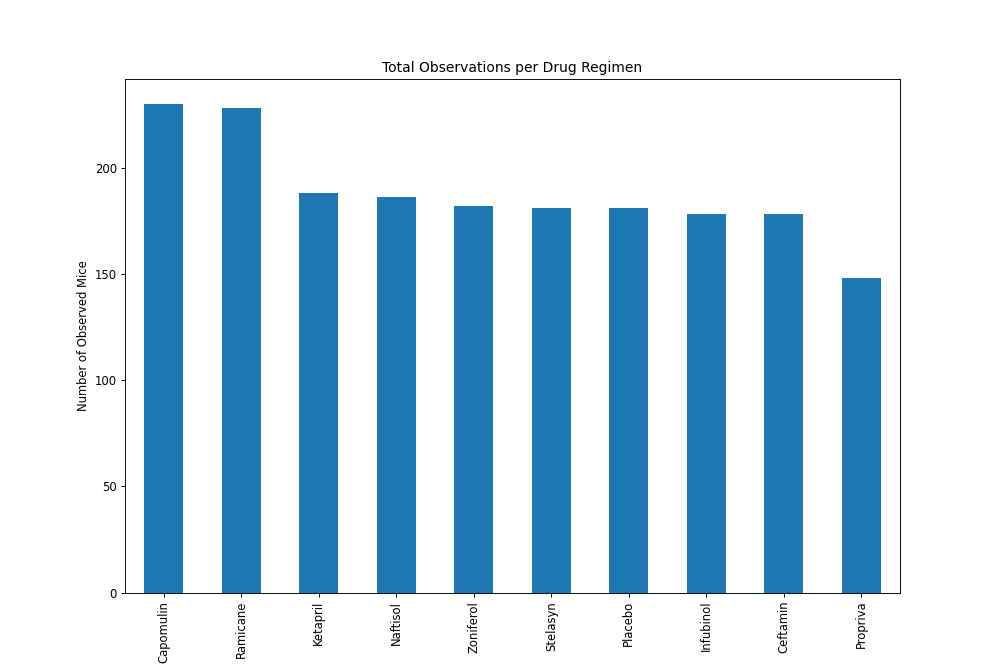

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group counts by drug regimen in a pandas Series
target_groupby = cleanest_df.groupby('Drug Regimen')['Timepoint'].count()
# Sort pandas Series by max to min
sorted_target = target_groupby.sort_values(ascending=False)
# Visualize the data with pandas
plt.style.use('default')
sorted_target.plot(kind='bar', figsize=(12,8), title="Total Observations per Drug Regimen",)
plt.ylabel("Number of Observed Mice")

plt.show()

<IPython.core.display.Javascript object>


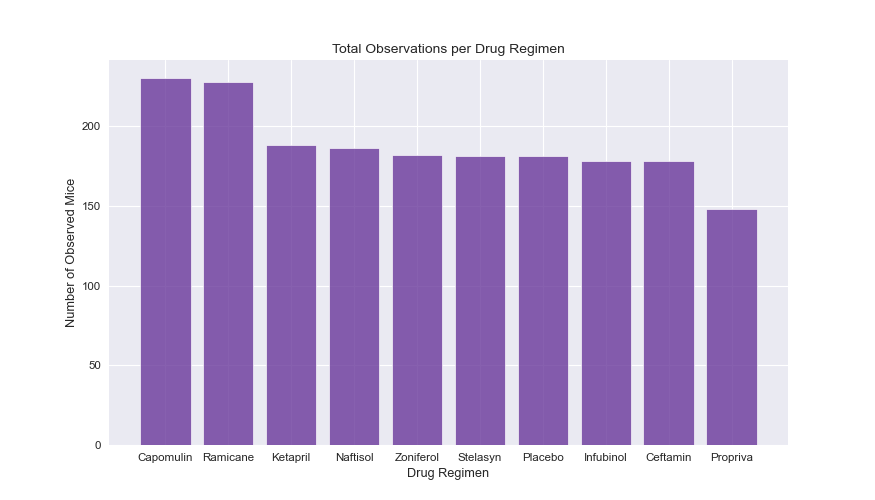

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group counts by drug regimen in a pandas Series 
target_groupby = cleanest_df.groupby('Drug Regimen')['Timepoint'].count()
# Sort counts by descending
sorted_target = target_groupby.sort_values(ascending=False)
# Save Drug Regimen names in sorted list for tick locations
sorted_drugs = sorted_target.index
# Create a range at the length of sorted_drugs to serve as an x-axis for the plot
xaxis = np.arange(0,len(sorted_drugs))
# Initialize a bar chart big enough for our data & plot the data
plt.figure(figsize=(10.5,6))
plt.style.use('seaborn')
plt.bar(xaxis, sorted_target, color='rebeccapurple', alpha=0.78, align="center", edgecolor="white", linewidth = 0.7)
# Map out tick locations in a list and apply to grap
tick_locations = [i for i in xaxis]
plt.xticks(tick_locations, sorted_drugs)
# Label the graph
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mice")
plt.title("Total Observations per Drug Regimen")

plt.show()

<IPython.core.display.Javascript object>


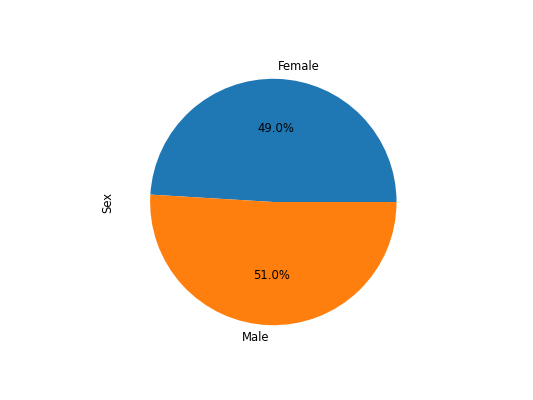

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Save the gender data in a variable
gender_count = cleanest_df.groupby('Sex')['Sex'].count()
# Plot style choice
plt.style.use('default')
# Plot data into pie chart
gender_count.plot(kind='pie', autopct="%1.1f%%")

plt.show()

<IPython.core.display.Javascript object>


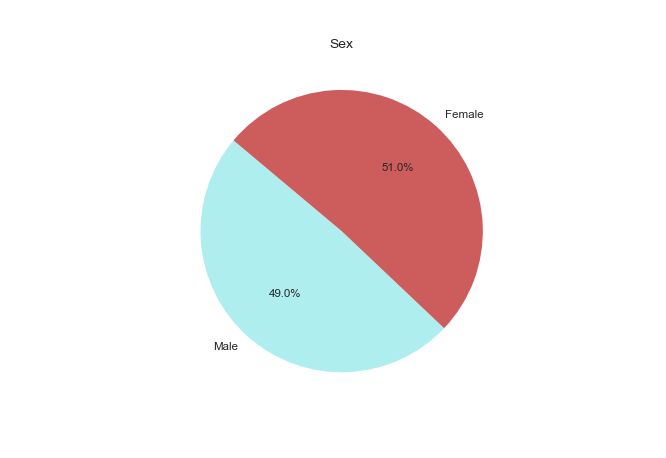

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create list for pie slice labels
pies = ["Male","Female"]
# Create list of colors respectively
colors=['paleturquoise','indianred']
# Save the gender data in a variable
gender_count = cleanest_df.groupby('Sex')['Sex'].count()
# Plot style choice
plt.style.use('seaborn')
# Plot data in pie chart
plt.pie(gender_count, labels=pies, colors=colors,autopct="%1.1f%%", startangle=140 )
# Create a title for the pie  chart
plt.title('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Group cleanest_df by Mouse ID and save a list of all the index values of the max Timepoint for each mouse 
id_max_time = cleanest_df.groupby('Mouse ID')['Timepoint'].idxmax()
id_max_time_list = id_max_time.tolist()

# Create relevant variables for the for loop and initialize an empty DataFrame quartiles_df

# List of column names
name_range = list(cleanest_df.columns)
# List length of Unique Mice
range1 = np.arange(0,len(id_max_time_list))
# List length of columns
range2 = np.arange(0,len(name_range))
# Row iterable list
row = []
# Empty dataframe for appending row
quartiles_df = pd.DataFrame(columns=name_range, index=range1)

# Initialize for loop to be length of Unique Mice
for i in range1:
    
# Create a 'placeholder' variable that grabs row index of max time
    placeholder = id_max_time_list[i]

# Nest a for loop in name_range in order to collect all values in the row
    for j in name_range:
        row.append(cleanest_df[j][placeholder])

# Return to original loop and append values of row to empty DataFrame
    quartiles_df.iloc[i] = pd.Series( { 'Mouse ID': row[0],
                                   'Drug Regimen' : row[1],
                                   'Sex' : row[2],
                                   "Age_months" : row[3],
                                   "Weight (g)" : row[4],
                                   "Timepoint" : row[5],
                                   "Tumor Volume (mm3)" : row[6],
                                   "Metastatic Sites" : row[7]
                                      })
# Reset the row variable to collect next row
    row=[]
     

# Create a index variable length of new dataframe and reset the index
newindex = np.arange(0,len(quartiles_df))
clean_quartiles_df = quartiles_df.set_index(newindex)
clean_quartiles_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.9734,2
1,a251,Infubinol,Female,21,25,45,65.5257,1
2,a262,Placebo,Female,17,29,45,70.7176,4
3,a275,Ceftamin,Female,20,28,45,62.9994,3
4,a366,Stelasyn,Female,16,29,30,63.4407,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.7107,0
244,z578,Ramicane,Male,11,16,45,30.6387,0
245,z581,Infubinol,Female,24,25,45,62.7545,3
246,z795,Naftisol,Female,13,29,45,65.7411,3


In [38]:
# List of drug treatments we want to analyze
index = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Mask that singles out all data where 'Drug Regimen' equals a value in the index
mask = clean_quartiles_df['Drug Regimen'].isin(index)
# Apply mask to clean df
clean_quartiles_df = clean_quartiles_df[mask]
# Reset the index of the further cleaned up df
newindex = np.arange(0,len(clean_quartiles_df))
clean_quartiles_df = clean_quartiles_df.set_index(newindex)   

# Create a list of dataframes corresponding to values in the index
max_tumor_df_for_drugs = [clean_quartiles_df[clean_quartiles_df["Drug Regimen"]==x] for x in index]

#Split off each df from our list of DataFrames and put the Final Tumor Volumes for each Drug Regimen in their own list
max_tumor_capomulin_df = max_tumor_df_for_drugs[0]
max_tumor_capomulin = max_tumor_capomulin_df["Tumor Volume (mm3)"]
max_tumor_ramicane_df = max_tumor_df_for_drugs[1]
max_tumor_ramicane = max_tumor_ramicane_df["Tumor Volume (mm3)"]
max_tumor_infubinol_df = max_tumor_df_for_drugs[2]
max_tumor_infubinol = max_tumor_infubinol_df["Tumor Volume (mm3)"]
max_tumor_ceftamin_df = max_tumor_df_for_drugs[3]
max_tumor_ceftamin = max_tumor_ceftamin_df["Tumor Volume (mm3)"]
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Capomulin quantitative analysis
quartiles1 = max_tumor_capomulin.quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1 - lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
sum1_df = clean_quartiles_df[(clean_quartiles_df['Tumor Volume (mm3)'] < lower_bound1)]
sum2_df = clean_quartiles_df[(clean_quartiles_df['Tumor Volume (mm3)'] > upper_bound1)]
capomulin_sum_df1 = sum1_df[sum1_df['Drug Regimen']==index[0]]
capomulin_sum_df2 = sum2_df[sum2_df['Drug Regimen']==index[0]]
capomulin_sum_df = pd.merge(capomulin_sum_df1,capomulin_sum_df2, how='outer')

# Ramicane quantitative analysis
quartiles2 = max_tumor_ramicane.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2 - lowerq2
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
sum1_df = clean_quartiles_df[(clean_quartiles_df['Tumor Volume (mm3)'] < lower_bound2)]
sum2_df = clean_quartiles_df[(clean_quartiles_df['Tumor Volume (mm3)'] > upper_bound2)]
ramicane_sum_df1 = sum1_df[sum1_df['Drug Regimen']==index[1]]
ramicane_sum_df2 = sum1_df[sum1_df['Drug Regimen']==index[1]]
ramicane_sum_df = pd.merge(ramicane_sum_df1,ramicane_sum_df2, how='outer')

# Infubinol quantitative analysis
quartiles3 = max_tumor_infubinol.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3 - lowerq3
lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
sum_df1 = clean_quartiles_df[(clean_quartiles_df['Tumor Volume (mm3)'] < lower_bound3)]
sum_df2 = clean_quartiles_df[(clean_quartiles_df['Tumor Volume (mm3)'] > upper_bound3)]
infubinol_sum_df1 = sum_df1[sum_df1['Drug Regimen']==index[2]]
infubinol_sum_df2 = sum_df2[sum_df2['Drug Regimen']==index[2]]
infubinol_sum_df = pd.merge(infubinol_sum_df1,infubinol_sum_df2, how='outer')

# Ceftamin quantitative analysis
quartiles4 = max_tumor_ceftamin.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4 - lowerq4
lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
sum1_df = clean_quartiles_df[(clean_quartiles_df['Tumor Volume (mm3)'] < lower_bound4)]
sum2_df = clean_quartiles_df[(clean_quartiles_df['Tumor Volume (mm3)'] > upper_bound4)]
ceftamin_sum_df1 = sum1_df[sum1_df['Drug Regimen']==index[3]]
ceftamin_sum_df2 = sum2_df[sum2_df['Drug Regimen']==index[3]]
ceftamin_sum_df = pd.merge(ceftamin_sum_df1,ceftamin_sum_df2, how='outer')

# Print output for all quantitative analyses
print(f"Capomulin's potential outliers: {capomulin_sum_df['Tumor Volume (mm3)']}")
print(f"Ramicane's potential outliers: {ramicane_sum_df['Tumor Volume (mm3)']}")
print(f"Infubinol's potential outliers: {infubinol_sum_df['Tumor Volume (mm3)']}")
print(f"Ceftamin's potential outliers: {ceftamin_sum_df['Tumor Volume (mm3)']}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: object)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: object)
Infubinol's potential outliers: 0    36.3213
Name: Tumor Volume (mm3), dtype: object
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: object)


<IPython.core.display.Javascript object>


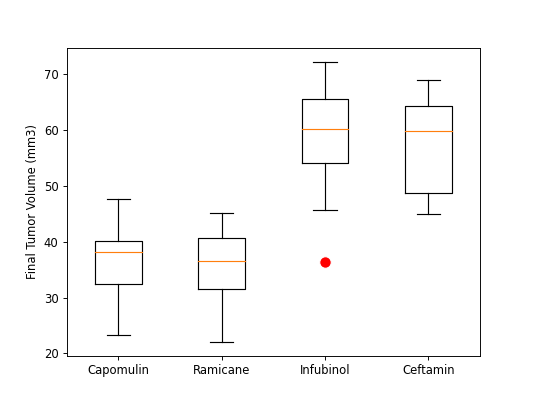

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Reload the index of drug treatments
index = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Plot style choice
plt.style.use('default')
# Initialize the boxplot graph
fig, ax = plt.subplots()
# Label the boxplot y-axis
ax.set_ylabel('Final Tumor Volume (mm3)')
# Style dictionary for the outliers
flierprops = dict(marker='o', markerfacecolor='red', markeredgecolor='white', markersize=10)
# Save our lists of Final Tumor Volumes into a single variable
data = (max_tumor_capomulin, max_tumor_ramicane, max_tumor_infubinol, max_tumor_ceftamin)
# Plot the boxplots onto figure
ax.boxplot(data, labels=index, flierprops = flierprops)

plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


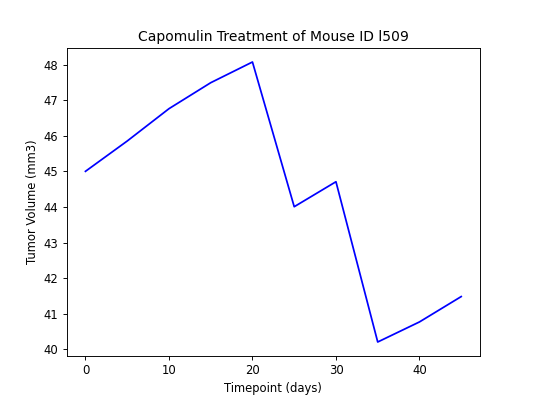

In [49]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Pull data for Mouse ID l509 into variable
mousel509_data = cleanest_df[cleanest_df['Mouse ID']=='l509']['Tumor Volume (mm3)']

# Create a range of x-values based on 'Timepoint'
times = np.arange(0,max(cleanest_df[cleanest_df['Mouse ID']=='l509']['Timepoint'])+1,5,)
# Create a title and labels for our figure
plt.title('Capomulin Treatment of Mouse ID l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
# Plot our data for Mouse ID l509 as a line chart
mousel509_data, = plt.plot(times, mousel509_data, color = 'blue')

plt.show()

<IPython.core.display.Javascript object>


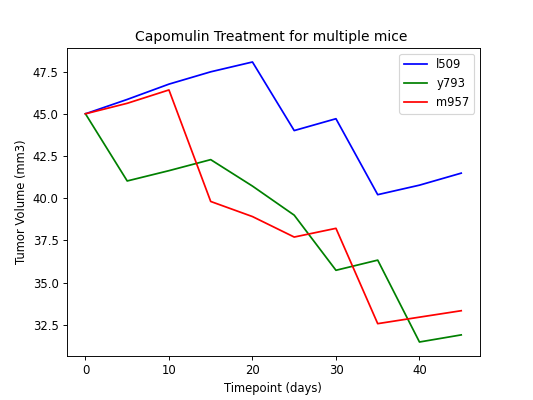

In [57]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Pull data for Mouse IDs into variables
mousel509_data = cleanest_df[cleanest_df['Mouse ID']=='l509']['Tumor Volume (mm3)']
mousey793_data = cleanest_df[cleanest_df['Mouse ID']=='y793']['Tumor Volume (mm3)']
mousem957_data = cleanest_df[cleanest_df['Mouse ID']=='m957']['Tumor Volume (mm3)']

# Create a range of x-values based on 'Timepoint'
times = np.arange(0,max(cleanest_df[cleanest_df['Mouse ID']=='l509']['Timepoint'])+1,5,)
# Create a title and labels for our figure
plt.title('Capomulin Treatment for multiple mice ')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
# Plot our data as a line chart
mousel509_data, = plt.plot(times, mousel509_data, color = 'blue', label='l509')
mousey793_data, = plt.plot(times, mousey793_data, color = 'green', label='y793')
mousem957_data, = plt.plot(times, mousem957_data, color = 'red', label='m957')
# Plot a legend on figure for ease of analysis
plt.legend(handles=[mousel509_data, mousey793_data, mousem957_data])

plt.show()

<IPython.core.display.Javascript object>


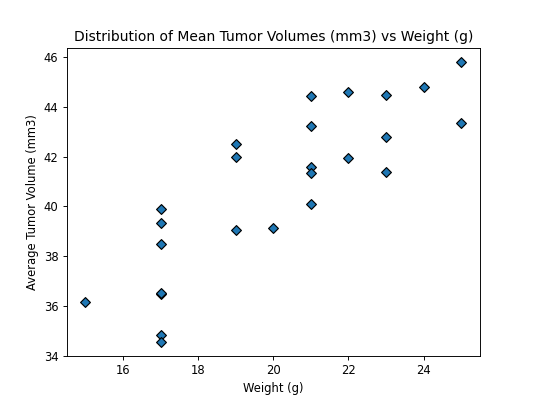

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# DataFrame to contain only drug treatment Capomulin
max_tumor_capomulin_df = cleanest_df[cleanest_df['Drug Regimen']=='Capomulin']
# Group this data based on Mouse ID
grouped_capomulin = max_tumor_capomulin_df.groupby('Mouse ID')
# Take the mean of all tumor volumes in GroupBy object
average_tv_capomulin_df = grouped_capomulin.mean()

# Create x-values and y-values for our scatterplot
weight_var = average_tv_capomulin_df['Weight (g)']
volume_var = average_tv_capomulin_df['Tumor Volume (mm3)']

# Plot those x- and y-values
plt.scatter(weight_var, volume_var, marker='D', edgecolor='black')
# Create a title and labels for our figure
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title("Distribution of Mean Tumor Volumes (mm3) vs Weight (g)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.
The p-value of the correlation is 1.322572243471279e-07.


<IPython.core.display.Javascript object>


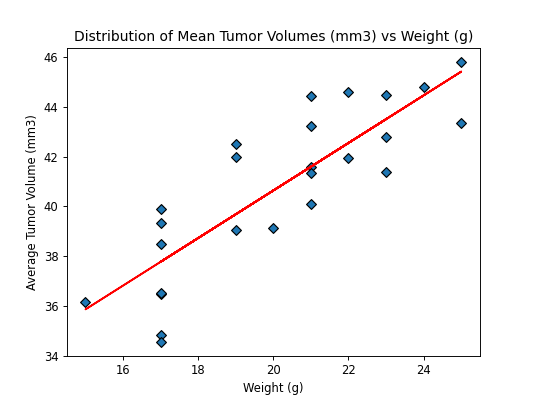

In [42]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Create a correlation variable to store Pearson's r-value and the corresponding p-value
correlation = st.pearsonr(weight_var,volume_var)
# Print the output neatly
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")
print(f"The p-value of the correlation is {correlation[1]}.")

# Recreate the above scatterplot
plt.scatter(weight_var, volume_var, marker='D', edgecolor='black')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title("Distribution of Mean Tumor Volumes (mm3) vs Weight (g)")

# Create 5 variables to store the outputs of SciPy.stats function .linregress
(slope, intercept, rval, pval, std_err) = st.linregress(weight_var, volume_var)
# Save our regression line under a variable 'line_fit'
line_fit = weight_var * slope + intercept
# Plot the regression line onto our scatterplot
plt.plot(weight_var, line_fit,"r-")

plt.show()